# MINE4201- SR -  Laboratorio 1
# Exploración modelos KNN



Vamos a utilizar las siguientes librerias en el laboratorio


In [2]:
import os
import numpy as np
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
import random
import matplotlib.pyplot as plt

#Para garantizar reproducibilidad en resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

## Suba al servidor los archivos u.data y u.item que se encuentran en el dataset descargado, en la pestaña files

In [3]:
ratings=pd.read_csv('../Dataset 100k/u.data', sep = '\t', names = [ 'user_id', 'item_id', 'rating', 'timestamp' ] )

In [4]:
items=pd.read_csv('../Dataset 100k/u.item', sep = '\|', names = ['movie id' ,'movie title','release date','video release date','IMDb URL ','unknown',
                                                          'Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama',
                                                          'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'], encoding='latin-1' )

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22420\3352963970.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  items=pd.read_csv('../Dataset 100k/u.item', sep = '\|', names = ['movie id' ,'movie title','release date','video release date','IMDb URL ','unknown',


Verifique que los ratings y los items hayan sido cargados correctamente





In [5]:
#ratings.rating=ratings.rating.astype('category')
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Ratings del usuario 196:

In [6]:
user_196_ratings = ratings[ratings["user_id"] == 196].sort_values(by="item_id", ascending=True)
user_196_ratings

,user_id,item_id,rating,timestamp
17102,196,8,5,881251753
56628,196,13,2,881251955
10981,196,25,4,881251955
22271,196,66,3,881251911
2374,196,67,5,881252017
21605,196,70,3,881251842
14606,196,94,3,881252172
23189,196,108,4,881252110
87863,196,110,1,881252305
10017,196,111,4,881251793


In [6]:
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Visualice la distribución de ratings, ¿Qué puede decir al respecto?

Text(0.5, 1.0, 'Distribución de ratings totales por rating (de 1 a 5)')

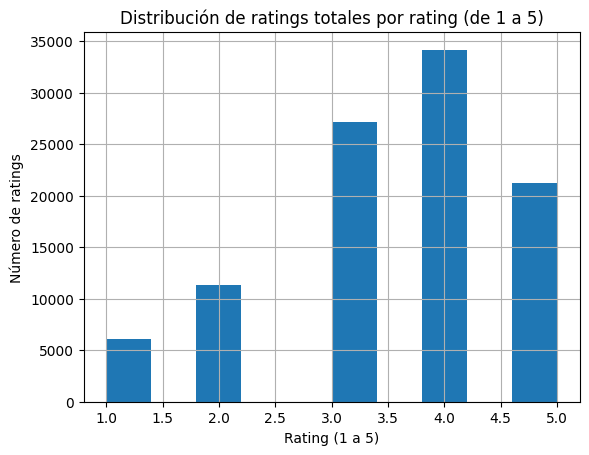

In [ ]:
plot = ratings.rating.hist()
plot.set_ylabel("Número de ratings")
plot.set_xlabel("Rating (1 a 5)")
plot.set_title('Distribución de ratings totales por rating (de 1 a 5)')

La mayoria de los ratings se encuentran en puntajes altos (3 a 5), mientras que la cantidad de puntajes bajos es significativamente menor.

## En la siguiente celda se esta calculando el número de ratings por usuario y  el promedio de sus calificaciones, el dataframe esta ordenado por el número de calificaciones

In [ ]:
ratings.groupby('user_id')['rating'].agg({'count','mean'}).sort_values(by='count', ascending=False)

,mean,count
user_id,,
405,1.834464,737
655,2.908029,685
13,3.097484,636
450,3.864815,540
276,3.465251,518
...,...,...
685,2.050000,20
475,3.600000,20
36,3.800000,20


In [ ]:
ratings.groupby('user_id')['rating'].mean().reset_index()

,user_id,rating
0,1,3.610294
1,2,3.709677
2,3,2.796296
3,4,4.333333
4,5,2.874286
...,...,...
938,939,4.265306
939,940,3.457944
940,941,4.045455
941,942,4.265823


##Utilice las siguientes celdas para encontrar respuesta a las siguientes preguntas

¿Cómo es la distribución del número de ratings por usuario?


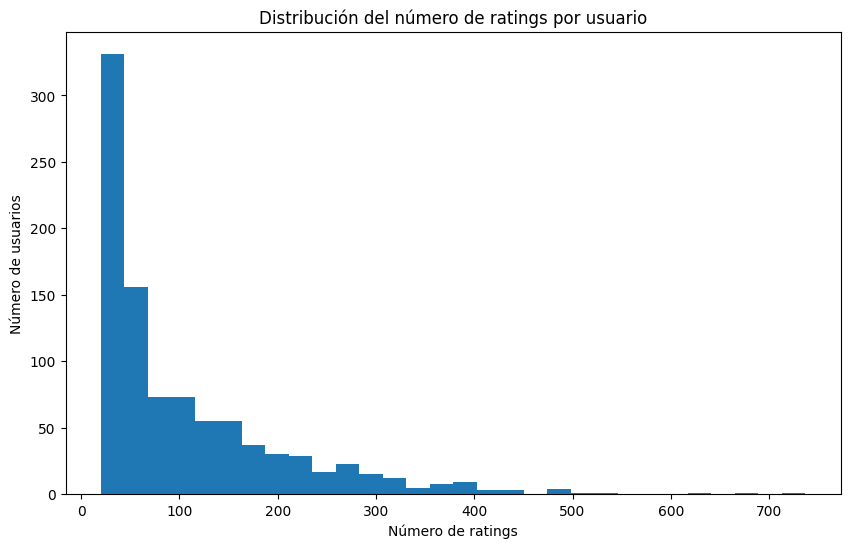

In [ ]:
# Agrupar por user y determinar el número de ratings
distribucion_count = ratings.groupby('user_id')['rating'].count()
# Gráfica: distribución del número de ratings por usuario
plt.figure(figsize=(10, 6))
plt.hist(distribucion_count, bins=30)
plt.xlabel('Número de ratings')
plt.ylabel('Número de usuarios')
plt.title('Distribución del número de ratings por usuario')
plt.show()

La mayoría de los usuarios han dado muy pocas calificaciones, como se observa en la alta concentración en el primer rango. A medida que aumenta el número de calificaciones, la frecuencia de usuarios disminuye. Esta distribución refleja la long tail, lo que quiere decir que una gran parte de las calificaciones proviene de una minoría de usuarios.

¿Cómo es la distribución del promedio de calificación por usuario?

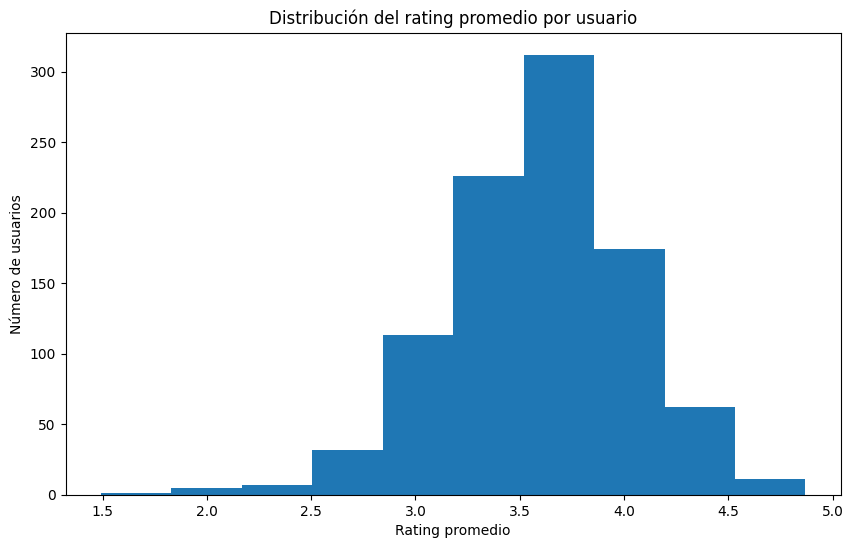

In [ ]:
distribucion_mean = ratings.groupby('user_id')['rating'].mean()
plt.figure(figsize=(10, 6))
plt.hist(distribucion_mean, bins=10)
plt.xlabel('Rating promedio')
plt.ylabel('Número de usuarios')
plt.title('Distribución del rating promedio por usuario')
plt.show()

La mayoría de los usuarios tienden a dar calificaciones positivas. También se observa que hay pocos usuarios con promedios de calificación bajos o extremadamente altos, lo que sugiere una tendencia hacia una evaluación moderada/positiva de los ítems.

##En la siguiente celda se esta calculando el número de ratings por items, el promedio de sus calificaciones y la varianza de sus calificaciones.

In [ ]:
ratings.groupby('item_id')['rating'].agg({'count','mean','var'}).join(items['movie title'], how='left')

,var,mean,count,movie title
item_id,,,,
1,0.860992,3.878319,452,GoldenEye (1995)
2,0.934116,3.206107,131,Four Rooms (1995)
3,1.470787,3.033333,90,Get Shorty (1995)
4,0.931358,3.550239,209,Copycat (1995)
5,0.895759,3.302326,86,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
...,...,...,...,...
1678,NaN,1.000000,1,B. Monkey (1998)
1679,NaN,3.000000,1,Sliding Doors (1998)
1680,NaN,2.000000,1,You So Crazy (1994)


##Utilice las siguientes celdas para encontrar la respuesta a las siguientes preguntas

¿Cuáles son los items con más calificaciones?  




In [ ]:
mt=ratings.groupby('item_id')['rating'].agg({'count','mean','var'}).join(items['movie title'], how='left')

In [ ]:
mt

,var,mean,count,movie title
item_id,,,,
1,0.860992,3.878319,452,GoldenEye (1995)
2,0.934116,3.206107,131,Four Rooms (1995)
3,1.470787,3.033333,90,Get Shorty (1995)
4,0.931358,3.550239,209,Copycat (1995)
5,0.895759,3.302326,86,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
...,...,...,...,...
1678,NaN,1.000000,1,B. Monkey (1998)
1679,NaN,3.000000,1,Sliding Doors (1998)
1680,NaN,2.000000,1,You So Crazy (1994)


In [ ]:
mt = mt.sort_values(by='count', ascending=False)
mt[:10]

,var,mean,count,movie title
item_id,,,,
50,0.776762,4.358491,583,Legends of the Fall (1994)
258,0.988885,3.803536,509,George of the Jungle (1997)
100,0.952100,4.155512,508,Heavy Metal (1981)
181,0.853693,4.007890,507,GoodFellas (1990)
294,1.206799,3.156701,485,Breakdown (1997)
286,1.367498,3.656965,481,Marvin's Room (1996)
288,1.240796,3.441423,478,Evita (1996)
1,0.860992,3.878319,452,GoldenEye (1995)
300,0.996147,3.631090,431,In & Out (1997)


A partir de la tabla mostrada, se pueden identificar las 10 peliculas con más ratings. Se puede decir que estas peliculas son las que se encuentran en el segmento popular (mainstream).

¿Se puede observar el fenomeno de cola larga en este dataset?

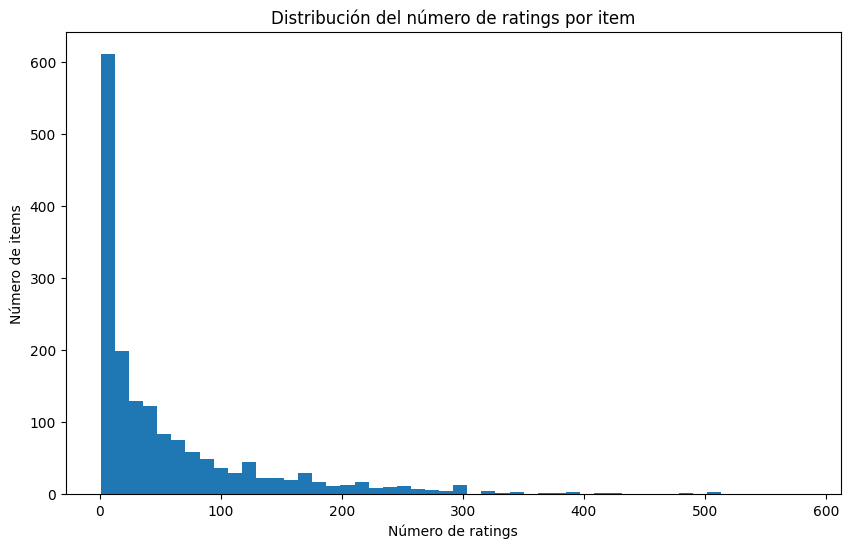

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(mt["count"], bins=50)
plt.xlabel('Número de ratings')
plt.ylabel('Número de items')
plt.title('Distribución del número de ratings por item')
plt.show()

Sí se puede observar, ya que se presenta una concentración mayor al lado izquierdo de la grafica. Esto quiere decir que la mayoría de las peliculas recibieron muy pocas calificaciones y que hay unas peliculas que tienen una concentración de popularidad y por lo tanto acumula la mayoría de las calificaciones.

## Creación de listas de recomendación no personalizadas

Genere inicialmente una lista de recomendación de tamaño 10 no personalizada con los items con mejor promedio, en teoría estos son los mejores items del dataset.

Ver:

http://www.evanmiller.org/how-not-to-sort-by-average-rating.html

https://es.wikipedia.org/wiki/Intervalo_de_confianza


In [ ]:
mt_10r = mt.sort_values(by='mean', ascending=False) [:10]
mt_10r

,var,mean,count,movie title
item_id,,,,
1293,0.0,5.0,3,Ayn Rand: A Sense of Life (1997)
1536,NaN,5.0,1,Cosi (1996)
1599,NaN,5.0,1,Guantanamera (1994)
1122,NaN,5.0,1,"Last Time I Saw Paris, The (1954)"
1653,NaN,5.0,1,Chairman of the Board (1998)
814,NaN,5.0,1,One Fine Day (1996)
1189,0.0,5.0,3,That Old Feeling (1997)
1201,NaN,5.0,1,"Maybe, Maybe Not (Bewegte Mann, Der) (1994)"
1467,0.0,5.0,2,"Cure, The (1995)"


1. ¿Qué problemas tiene generar una lista no personalizada solamente con el promedio?

  El uso exclusivo del promedio para generar recomendaciones puede producir resultados sesgados y poco representativos. Una película con una sola calificación alta podría aparecer como recomendada, a pesar de no contar con suficiente respaldo de otros usuarios. Este enfoque es problemático debido a:

  - Falta de representatividad: Una única calificación no refleja la calidad real de la película.
  - Sesgo por muestra pequeña: El sistema sobreestima películas con pocas calificaciones y pasa por alto aquellas con más evaluaciones, aunque su promedio sea ligeramente menor.

  Como se observa en la tabla, las películas recomendadas no cuentan con más de tres calificaciones, lo que evidencia el riesgo de generar recomendaciones sesgadas y poco confiables.

2. ¿Es posible generar una mejor lista de recomendación teniendo en cuenta que tanto el número de ratings del item como su promedio?

  Si, se puede usar un promedio ponderado, ya que este considera tanto el promedio como el número de calificaciones que tiene una pelicula. Dándole así mayor peso a aquellas peliculas que tienen mayor número de calificiones.

#Creación del dataset de entrenamiento y prueba

El próximo paso es cargar los datos a surprise, para esto vamos a inicializar un modelo de datos de surprise con la información de los ratings cargados en el dataframe

In [ ]:
reader = Reader( rating_scale = ( 1, 5 ) )
#Se crea el dataset a partir del dataframe
surprise_dataset = Dataset.load_from_df( ratings[ [ 'user_id', 'item_id', 'rating' ] ], reader )

Se divide el dataset en entrenamiento y test. El dataset de entrenamiento será presentado al algoritmo de recomendación y el dataset de test nos servirá para medir qué tan buenas fueron las predicciones del sistema de recomendación. El conjunto de test generado es una lista con los ratings de prueba

In [ ]:
train_set, test_set=  train_test_split(surprise_dataset, test_size=.2)

In [ ]:
train_set.n_ratings

80000

In [ ]:
len(test_set)

20000

In [ ]:
#Este es el primer elemento del dataset de prueba (usuario 154, pelicula 302, rating 4)
test_set[0]

(154, 302, 4.0)

## Creación de modelo de filtrado colaborativo basado en similitud con usuarios o items cercanos

Surprise cuenta con la implementación de los modelos colaborativos dentro de la clase [KNNBasic](https://surprise.readthedocs.io/en/stable/knn_inspired.html)

El modelo recibe los siguientes parámetros:


*   k: El máximo número de vecinos con el que se hará la extrapolación
*   min_k : El mínimo número de vecinos con el que se extrapolará un rating
*   sim_options : Opciones de similitud pasadas como un diccionario de python, aqui se le configura al modelo el tipo de similitud a usar para encontrar los vecinos y si la extrapolación debe hacerse usando usuarios o items similares. Revise el formato y similitudes disponibles en surprise en [este link](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measure-configuration)





In [ ]:
# se crea un modelo knnbasic item-item con similitud coseno
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)

In [ ]:
#Se le pasa la matriz de utilidad al algoritmo
algo.fit(trainset=train_set)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Una vez cargados los ratings al modelo, se puede realizar una predicción para un usuario, en este caso vamos a calcular la predicción que el modelo esta realizando para la primera entrada del dataset de test la predicción para el usuario con id 154 y el item con id 302, que corresponde a la película L.A. Confidential (1997)

---



In [ ]:
#Verifique la propiedad est de la predicción
algo.predict(154,302)

Prediction(uid=154, iid=302, r_ui=None, est=4.249202065377386, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
items[items['movie id']==302]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
301,302,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


Como podemos ver, la predicción (4.24) del modelo no esta alejada de lo que realmente opinó el usuario  (4.0)

Para medir la calidad de la predicción para todos los usuarios e items del dataset de prueba, vamos a comparar lo que dice el modelo de predicción vs lo que dice el conjunto de prueba, para esto vamos a usar la métrica [RMSE](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.rmse)

Inicialmente calculamos la predicción para todos los elementos del conjunto de test

In [ ]:
test_predictions=algo.test(test_set)

In [ ]:
#5 primeras predicciones
test_predictions[0:5]

[Prediction(uid=154, iid=302, r_ui=4.0, est=4.249202065377386, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=896, iid=484, r_ui=4.0, est=2.8976616922320964, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=230, iid=371, r_ui=4.0, est=4.1968378983432535, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=234, iid=294, r_ui=3.0, est=3.0978778071364186, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=25, iid=729, r_ui=4.0, est=4.148885433441103, details={'actual_k': 20, 'was_impossible': False})]

Ahora se mide el RMSE de las predicciones vs el valor del dataset

In [ ]:
# En promedio, el sistema encuentra ratings que estan una estrella por encima o por debajo del rating del usuario
accuracy.rmse( test_predictions, verbose = True )

RMSE: 1.0453


1.0453343976192102

##Utilice las siguientes celdas para encontrar la respuesta a las siguientes preguntas



¿Cuál es el RMSE de un modelo usuario-usuario con los mismos parámetros de similitud?

In [ ]:
sim_options_user = {'name': 'cosine',
                    'user_based': True
               }
algo_user = KNNBasic(k=20, min_k=2, sim_options=sim_options_user)

In [ ]:
algo_user.fit(trainset=train_set)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
algo_user.predict(154,302)

Prediction(uid=154, iid=302, r_ui=None, est=4.35, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
test_predictions_user=algo_user.test(test_set)

In [ ]:
accuracy.rmse( test_predictions_user, verbose = True )

RMSE: 1.0166


1.0166414414593592

El RMSE del modelo usuario-usuario es de 1.0166, el cual es ligermente menor al de item-item, lo que quiere decir que tiene un rendimiento ligeramente mejor

**Modelos usuario-usuario con diferentes parametros de similitud**

In [ ]:
#Modelo con k=10 (10 vecinos)
sim_options_user10 = {'name': 'cosine',
                      'user_based': True
               }
algo_user10 = KNNBasic(k=10, min_k=2, sim_options=sim_options_user10)
algo_user10.fit(trainset=train_set)
test_predictions_user10=algo_user10.test(test_set)
accuracy.rmse( test_predictions_user10, verbose = True )

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0386


1.0385724992200804

In [ ]:
#Modelo con k=30 (30 vecinos)
sim_options_user30 = {'name': 'cosine',
                     'user_based': True
               }
algo_user30 = KNNBasic(k=30, min_k=2, sim_options=sim_options_user30)
algo_user30.fit(trainset=train_set)
test_predictions_user30=algo_user30.test(test_set)
accuracy.rmse( test_predictions_user30, verbose = True )

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0112


1.0112014014941013

In [ ]:
#Modelo con k=40 (40 vecinos)
sim_options_user40 = {'name': 'cosine',
                     'user_based': True
               }
algo_user40 = KNNBasic(k=40, min_k=2, sim_options=sim_options_user40)
algo_user40.fit(trainset=train_set)
test_predictions_user40=algo_user40.test(test_set)
accuracy.rmse( test_predictions_user40, verbose = True )

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0093


1.0093492689931778

In [ ]:
#Modelo con k=50 (50 vecinos)
sim_options_user50 = {'name': 'cosine',
                      'user_based': True
               }
algo_user50 = KNNBasic(k=50, min_k=2, sim_options=sim_options_user50)
algo_user50.fit(trainset=train_set)
test_predictions_user50=algo_user50.test(test_set)
accuracy.rmse( test_predictions_user50, verbose = True )

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0095


1.0094939948005999

¿Cuál es el efecto de cambiar el número de vecinos en la calidad del modelo usuario-usuario ?

Al aumentar el número de vecinos (k) en el modelo usuario-usuario con similitud coseno, se observa una mejora en la precisión hasta un punto óptimo. Con k=10, el RMSE fue 1.0386, lo que indica un desempeño más débil debido a la influencia de pocos vecinos, lo que puede generar predicciones sesgadas o ruidosas. Al incrementar a k=30, el RMSE se redujo a 1.0112, mostrando una mejora significativa al considerar más opiniones relevantes.

El mejor valor de RMSE se obtuvo con 40 vecinos, donde este bajó hasta 1.0093. Sin embargo, al aumentar a k=50, el RMSE aumentó a 1.0095, evidenciando que en ese punto, agregar más vecinos no aporta beneficios adicionales. Por lo tanto, el mejor desempeño se alcanza con k=40.

##Generando listas de predicciones para los usuarios

Retomemos nuestro modelo inicial y ajustémolo con todos los ratings disponibles

Para generar una lista de recomendación se debe crear un dataset de "test" con las entradas faltantes de la matriz utilidad para que el modelo cree las predicciones (terminar de llenar la matriz de utilidad)



In [ ]:
#Se crea el dataset para modelo
rating_data=surprise_dataset.build_full_trainset()
# Se crea dataset de "prueba" con las entradas faltantes para generar las predicciones
test=rating_data.build_anti_testset()

# se crea el mismo modelo que el del ejemplo
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)
algo.fit(rating_data)
predictions=algo.test(test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
#10 primeras predicciones
predictions[0:10]

[Prediction(uid=196, iid=302, r_ui=3.52986, est=3.4998074068929244, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=377, r_ui=3.52986, est=3.531852919263047, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=51, r_ui=3.52986, est=3.59549677885145, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=346, r_ui=3.52986, est=3.5471070543165877, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=474, r_ui=3.52986, est=3.7990088769026116, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=265, r_ui=3.52986, est=3.4464297466659812, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=465, r_ui=3.52986, est=3.5022156502733557, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=451, r_ui=3.52986, est=3.6948301041629965, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=86, r_ui=3.52986, e

In [ ]:
#Predicciones para usuario 196
user_predictions=list(filter(lambda x: x[0]==196,predictions))

In [ ]:
#Ordenamos de mayor a menor estimación de relevancia
user_predictions.sort(key=lambda x : x.est, reverse=True)

In [ ]:
#tomamos las 10 primeras predicciones
user_predictions=user_predictions[0:10]

In [ ]:
user_predictions

[Prediction(uid=196, iid=1309, r_ui=3.52986, est=4.5, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid=196, iid=1310, r_ui=3.52986, est=4.5, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid=196, iid=1676, r_ui=3.52986, est=4.25, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid=196, iid=1675, r_ui=3.52986, est=4.25, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid=196, iid=1289, r_ui=3.52986, est=4.202435603862276, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=1643, r_ui=3.52986, est=4.097225899300029, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=1593, r_ui=3.52986, est=4.090909090909091, details={'actual_k': 11, 'was_impossible': False}),
 Prediction(uid=196, iid=935, r_ui=3.52986, est=4.05136705364539, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=1216, r_ui=3.52986, est=4.0506920732628675, details={'actual_k': 20, 'was_i

In [ ]:
#Se convierte a dataframe
labels = ['movie id', 'estimation']
df_predictions = pd.DataFrame.from_records(list(map(lambda x: (x.iid, x.est) , user_predictions)), columns=labels)

In [ ]:
#Lo unimos con el dataframe de películas
df_predictions.merge(items[['movie id','movie title','IMDb URL ']], how='left', on='movie id')

,movie id,estimation,movie title,IMDb URL
0,1309,4.500000,"Very Natural Thing, A (1974)",http://us.imdb.com/M/title-exact?Very%20Natura...
1,1310,4.500000,"Walk in the Sun, A (1945)",http://us.imdb.com/M/title-exact?Walk%20in%20t...
2,1676,4.250000,"War at Home, The (1996)",http://us.imdb.com/M/title-exact?War%20at%20Ho...
3,1675,4.250000,"Sunchaser, The (1996)","http://us.imdb.com/M/title-exact?Sunchaser,%20..."
4,1289,4.202436,Jack and Sarah (1995),http://us.imdb.com/M/title-exact?Jack%20and%20...
5,1643,4.097226,Angel Baby (1995),http://us.imdb.com/Title?Angel+Baby+(1995/I)
6,1593,4.090909,Death in Brunswick (1991),http://us.imdb.com/M/title-exact?Death%20in%20...
7,935,4.051367,Paradise Road (1997),http://us.imdb.com/M/title-exact?Paradise%20Ro...
8,1216,4.050692,Kissed (1996),http://us.imdb.com/M/title-exact?Kissed%20%281...
9,1312,4.049247,"Pompatus of Love, The (1996)",http://us.imdb.com/M/title-exact?Pompatus%20of...


## Utilice las siguientes celdas para encontrar la respuesta a las siguientes preguntas

Cree al menos 2 usuarios (al primero asígnele el id 944) y cree para cada usuario ratings nuevos (puede hacerlo haciendo a traves del [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html), o añadiendo líneas al archivo). Asigne a un usuario preferencias de un segmento popular (mainstream) y a otro preferencias de un nicho.

¿Que tan bien cree que el sistema esta respondiendo a los gustos del usuario?

¿Que tan bien cree que el sistema esta respondiendo al objetivo de buscar items para el usuario dentro de la cola larga?

In [ ]:
# Obtenemos las top 10 peliculas nicho - removemos los nulos
mt_nicho = mt[mt['count'] >= 5]
mt_nicho = mt_nicho.sort_values(by='count', ascending=True)[:10]
niche_list = mt_nicho.index.tolist()
niche_list

[1272, 1346, 1529, 1353, 1530, 1555, 1367, 1442, 1440, 1378]

In [ ]:
# Obtenemos las peliculas mainstream
mt_mainstream = mt.sort_values(by='count', ascending=False)[:10]
mainstream_list = mt_mainstream.index.tolist()
mainstream_list

[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]

In [ ]:
import random

In [ ]:
niche_users_list = []
for movie_id in niche_list:
  random_rating = random.randint(3, 5)
  new_data = {'user_id': 944, 'item_id': movie_id, 'rating': random_rating, 'timestamp': 978300760}
  niche_users_list.append(new_data)

In [ ]:
mainstream_users_list = []
for movie_id in mainstream_list:
  random_rating = random.randint(3, 5)
  new_data = {'user_id': 945, 'item_id': movie_id, 'rating': random_rating, 'timestamp': 978300761}
  mainstream_users_list.append(new_data)

In [ ]:
ratings_copy = pd.concat([ratings, pd.DataFrame(niche_users_list + mainstream_users_list)], ignore_index = True)
ratings_copy.tail(20)

,user_id,item_id,rating,timestamp
100000,944,1272,5,978300760
100001,944,1346,3,978300760
100002,944,1529,4,978300760
100003,944,1353,4,978300760
100004,944,1530,5,978300760
100005,944,1555,3,978300760
100006,944,1367,3,978300760
100007,944,1442,4,978300760
100008,944,1440,4,978300760
100009,944,1378,4,978300760


Se actualiza el dataset y se vuelve a entrenar un modelo

In [ ]:
surprise_dataset_updated = Dataset.load_from_df(ratings_copy[['user_id', 'item_id', 'rating']], reader)

# Entrenamos el modelo
trainset_updated = surprise_dataset_updated.build_full_trainset()
algo_updated = KNNBasic(k=20, min_k=2, sim_options=sim_options)
algo_updated.fit(trainset_updated)

# Se crea dataset de "prueba" con las entradas faltantes para generar las predicciones
testset_updated = trainset_updated.build_anti_testset()
predictions_updated = algo_updated.test(testset_updated)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Creamos las predicciones para el usuario de nicho

In [ ]:
user944_predictions = list(filter(lambda x: x[0] == 944, predictions_updated))
user944_predictions.sort(key=lambda x: x.est, reverse=True)
user944_predictions = user944_predictions[:10]

df_predictions_944 = pd.DataFrame.from_records(list(map(lambda x: (x.iid, x.est), user944_predictions)), columns=labels)
df_predictions_944 = df_predictions_944.merge(items[['movie id', 'movie title', 'IMDb URL ']], how='left', on='movie id')

df_predictions_944

,movie id,estimation,movie title,IMDb URL
0,1204,5.000000,To Be or Not to Be (1942),http://us.imdb.com/M/title-exact?To%20Be%20or%...
1,1598,4.513167,City of Industry (1997),http://us.imdb.com/M/title-exact?City%20of%20I...
2,1283,4.501938,Out to Sea (1997),http://us.imdb.com/M/title-exact?Out+to+Sea+(1...
3,1098,4.501259,Flirting With Disaster (1996),http://us.imdb.com/M/title-exact?Flirting%20Wi...
4,297,4.500193,Ulee's Gold (1997),http://us.imdb.com/M/title-exact?Ulee%27s+Gold...
5,754,4.500000,Red Corner (1997),http://us.imdb.com/M/title-exact?Red+Corner+(1...
6,495,4.500000,Around the World in 80 Days (1956),http://us.imdb.com/M/title-exact?Around%20the%...
7,532,4.500000,Kama Sutra: A Tale of Love (1996),http://us.imdb.com/M/title-exact?Kama%20Sutra%...
8,1183,4.500000,"Cowboy Way, The (1994)","http://us.imdb.com/M/title-exact?Cowboy%20Way,..."
9,801,4.500000,"Air Up There, The (1994)",http://us.imdb.com/M/title-exact?Air%20Up%20Th...


Creamos las predicciones para el usuario mainstream

In [ ]:
user945_predictions = list(filter(lambda x: x[0] == 945, predictions_updated))
user945_predictions.sort(key=lambda x: x.est, reverse=True)
user945_predictions = user945_predictions[:10]

df_predictions_945 = pd.DataFrame.from_records(list(map(lambda x: (x.iid, x.est), user945_predictions)), columns=labels)
df_predictions_945 = df_predictions_945.merge(items[['movie id', 'movie title', 'IMDb URL ']], how='left', on='movie id')

df_predictions_945

,movie id,estimation,movie title,IMDb URL
0,1122,4.500000,They Made Me a Criminal (1939),http://us.imdb.com/M/title-exact?They%20Made%2...
1,1306,4.496629,Delta of Venus (1994),http://us.imdb.com/M/title-exact?Delta%20of%20...
2,1307,4.406637,Carmen Miranda: Bananas Is My Business (1994),http://us.imdb.com/M/title-exact?Carmen%20Mira...
3,1556,4.400000,Condition Red (1995),http://us.imdb.com/M/title-exact?Condition%20R...
4,1674,4.400000,Mamma Roma (1962),http://us.imdb.com/M/title-exact?Mamma%20Roma%...
5,1308,4.346737,Babyfever (1994),http://us.imdb.com/M/title-exact?Babyfever%20(...
6,1582,4.333333,T-Men (1947),http://us.imdb.com/M/title-exact?T-Men%20(1947)
7,1561,4.333333,Tigrero: A Film That Was Never Made (1994),http://us.imdb.com/M/title-exact?Tigrero:%20A%...
8,1565,4.333333,Daens (1992),http://us.imdb.com/M/title-exact?Daens%20(1992)
9,1563,4.333333,"Promise, The (Versprechen, Das) (1994)","http://us.imdb.com/M/title-exact?Versprechen,%..."


El sistema está respondiendo de buena manera a los gustos de cada usuario. Como se puede ver en las recomendaciones, cada usuario obtuvo sugerencias muy distintas al otro, dado que las preferencias especificadas para cada uno eran bastante distintas.

Por otra parte, el modelo responde bien al objetivo de buscar items para el usuario dentro de la cola larga, ya que no se está quedando con las recomendaciones más populares, sino que presenta sugerencias variadas para cada usuario.

#Otros frameworks para filtrado colaborativo

A continuación se presenta un ejemplo de cómo se crearía un sistema de recomendación con LensKit. Los fragmentos de código son adaptados de la documentación oficial de LensKit.

https://lkpy.lenskit.org/en/stable/GettingStarted.html

In [ ]:
!pip install lenskit

In [ ]:
from lenskit.datasets import ML100K
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, item_knn, user_knn
from lenskit import topn

In [ ]:
# Se definen modelos item-item y usuario-usuario con 20 vecinos
algo_ii = item_knn.ItemItem(20)
algo_uu = user_knn.UserUser(20)

In [ ]:
# Se crea una función para evaluar los modelos
def eval(aname, algo, train, test):
    fittable = util.clone(algo)
    fittable = Recommender.adapt(fittable)
    fittable.fit(train)
    users = test.user.unique()
    recs = batch.recommend(fittable, users, 100)
    recs['Algorithm'] = aname
    return recs

In [ ]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
ratings = ratings.rename(columns={'user_id': 'user'})
ratings = ratings.rename(columns={'item_id': 'item'})

In [ ]:
all_recs = []
test_data = []
for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
    test_data.append(test)
    all_recs.append(eval('ItemItem', algo_ii, train, test))
    all_recs.append(eval('UserUser', algo_uu, train, test))

Resultados y evalución del modelo

In [ ]:
# Recomendaciones realizadas
all_recs = pd.concat(all_recs, ignore_index=True)
all_recs.head()

,item,score,user,rank,Algorithm
0,512,5.418443,9,1,ItemItem
1,1537,5.325932,9,2,ItemItem
2,1418,5.289716,9,3,ItemItem
3,113,5.279388,9,4,ItemItem
4,1398,5.227054,9,5,ItemItem


In [ ]:
test_data = pd.concat(test_data, ignore_index=True)

In [ ]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
results = rla.compute(all_recs, test_data)
results.head()

nrecs      ndcg
Algorithm user                 
ItemItem  9       100  0.100729
          22      100  0.093373
          28      100  0.101332
          30      100  0.000000
          35      100  0.000000

Métrica "Normalized Discounted Cumulative Gain" (nDCG) para cada uno de los modelos

In [ ]:
results.groupby('Algorithm').ndcg.mean()

,ndcg
Algorithm,
ItemItem,0.099028
UserUser,0.065484
